In [ ]:
#Importing: (You can add or change this)
import pandas as pd
import numpy as np
import seaborn
import matplotlib as plt
from google.colab import files

In [ ]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Adding the dataset
data = files.upload()

Saving global_air_pollution_dataset.csv to global_air_pollution_dataset (2).csv


In [ ]:
pollution_df = pd.read_csv("global_air_pollution_dataset.csv")

Objectives:
- Average AQI for all the cities in the country
- Mean AQI (What city and state?)
- Highest AQI (What city and state?)
- Lowest AQI (What city and state?)
- articles to add context of why the results are like that
- Some graphs to explain it


Let's check out the dataset!

In [ ]:
#This looks at the first 5 rows of the dataframe
pollution_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
pollution_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


# Cleaning

In [ ]:
#Make a new dataframe:
us_df = pollution_df

In [ ]:
#We only want the rows that have United States as the country
non_usa = []

#Let's make a loop so we can filter through the dataset.
#This loop goes through each row and checks what country it is. If it is not the US, it will remove that row from the data.

for country in pollution_df.index:
  if pollution_df["Country"].iloc[country] != "United States of America":
    non_usa.append(country)
#removing the rows that are not the US

In [ ]:

us_df = us_df.drop(non_usa).reset_index().drop(["index"], axis=1)

In [ ]:
#Let's look at our new dataframe
us_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
1,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate
2,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate
3,United States of America,Port Neches,34,Good,1,Good,19,Good,7,Good,34,Good
4,United States of America,Portales,77,Moderate,1,Good,34,Good,0,Good,77,Moderate


# Analyzing

In [ ]:
#Now let's look at the spread of the AQI values
pollution_df['AQI Category'].value_counts()

AQI Category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

In [ ]:
#Now let's make it into a graph so it is easier to see!
pollution_df['AQI Category'].value_counts().plot.bar()

I went on Tableau and created a map of all the cities in the United States with the AQI values.

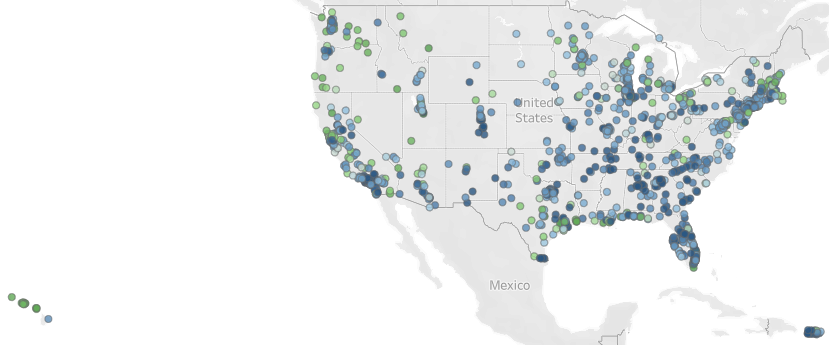
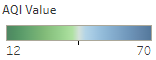

What do you noticed from the data?

In [ ]:
#Lets look at the data again!
us_df.describe()

In [ ]:
#The lowest AQI is 12.0 so lets find which city that is!

In [ ]:
us_df[us_df['AQI Value']==us_df['AQI Value'].min()]

News Article on Provo, Utah:
https://universe.byu.edu/2024/04/02/harmful-airborne-particulate-matter-levels-down-in-provo-report-shows/

In [ ]:
us_df[us_df['AQI Value']==us_df['AQI Value'].max()]

New article related to Durango, Colorado
https://www.durangoherald.com/articles/air-quality-in-durango-measures-at-hazardous-levels/